# CS559 - F20 Project #1

## Task Desciption
You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of `target` column in the test set using either **Logistic Regression** and **SVM**. You are welcome to use **regularizaiton**. 

## File descriptions
- train.csv - the training set (202 columns)

- test.csv - the test set. The test set contains some rows which are not included in scoring.

## Rules
- The data does not have specific column names. Therefore, you will not know what data is about. 
- However, you still can do classicaition problem without clustering the training set. **No unsupervised learning techniques in this project**. 
- There are 202 columns. This means that the key of high accuracy comes from **EDA** and **feature enegineering**. 
- There are no rules on EDA and Feature Engineering. 
- On your model, make sure you can reduce the columns at the most of 25%. If we use all columns, we may have high computational cost and getting into bias-variance tradeoff and underfit vs. overfit situations. 
- The project is out of 100. 
    - 50 points will come from your EDA and any pre-processing work. 
    - 30 points will come from your model: Accuracy + overcoming any ML challenges. 
    - 10 points will come from in-class competition. 
        - Ranking the accuracy with less features. 
    - 10 points will come from a report describing your work flow and model evaluations.
        - must be submitted in different file (e.g., pdf, docx). 
        
## Recommand Before-Preprocessing
- You can split the set from the data distribution. 
- You can make multiple new data frames by randomly selecting columns. 
- You can do similar by rows. 

## Recommand Before-training model
- Make sure to delete features from supportive reasons. 

Proejct DUE: 10/23/2020 Friday 11:59 PM. 




All my import statements to run the methods

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [2]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Read Data

In [3]:
#load training data
#ID column did not seem relevant
data = pd.read_csv('train.csv').drop(columns = ['ID_code'])

In [4]:
#load test data
data2 = pd.read_csv('test.csv').drop(columns = ['ID_code'])
target = pd.read_csv('test_target.csv').drop(columns = ['ID_code'])

In [5]:
x = data.drop(columns = ['target'])
# transformer = Normalizer().fit(x)  # fit does nothing.
# x = transformer.transform(x)
y = data['target']

# Initial Test Run

Ran a logistic regression test run using all the features just to get a sense of how well the prediction algorithm works when utilizing all the features

In [6]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
lr = LogisticRegression()
lr.fit(x_sc, y)
y_pred = lr.predict(x_sc)

In [7]:
print(confusion_matrix(y, y_pred))
print('accuracy score %.3f' %(accuracy_score(y, y_pred)))

[[177450   2452]
 [ 14645   5453]]
accuracy score 0.915


The model seems to predict decently well with .915 accuracy, the mose error seems to be from predicting 1s properly

# EDA

In [8]:
corr = data.corr()
# correlation matrix

Since correlation matrix is too large to read line by line, I opted to find the largest correlation in the whole table and the largest correlation among all the features

In [9]:
a = 0 #index of largest correlation
b = 0 #index of largest correlation
a1 = 0 #index of largest feature correlation
b1 = 0 #index of largest feature correlation
maxs = 0 #max correlation value
maxs2 = 0 #max feature correlation value
for i in range(len(corr)):
    for j in range(i + 1, len(corr)):
#         corrs.append(corr.iloc[i, j])
        if i != j and abs(corr.iloc[i, j]) > maxs:
            a = i
            b = j
            maxs = abs(corr.iloc[i, j])
        if i != j and abs(corr.iloc[i, j]) > maxs2 and i != 0:
            a1 = i
            b1 = j
            maxs2 = abs(corr.iloc[i, j])

print(a) 
print(b)
print(maxs) 
print(a1) 
print(b1)
print(maxs2)

0
82
0.08091733227447406
27
140
0.009844361358419677


(array([ 3., 11., 21., 20., 26., 30., 27., 34., 18., 10.]),
 array([-0.08091733, -0.06615251, -0.0513877 , -0.03662288, -0.02185806,
        -0.00709324,  0.00767157,  0.02243639,  0.03720121,  0.05196603,
         0.06673085]),
 <a list of 10 Patch objects>)

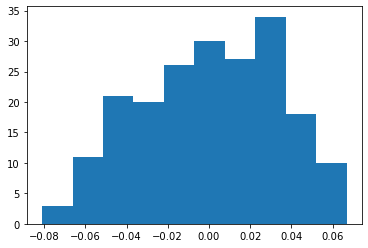

In [10]:
#seperated the row for target
corrs = corr['target'][1:]
corrs.shape
plt.hist(corrs)

There is a left skewed relationship within the data, since I want highest correlation (sign does not matter) I opted to test all the features with under abs(.01) correlation to see how much these features will impact the results found in my initial logistic regression.

In [11]:
keep = (corrs > .01) | (corrs < -.01) # remove features bellow abs(.01)
names = data.drop(columns = ['target']).columns
sum(keep) #number of features kept

161

In [12]:
x = data.drop(columns = ['target'])[names[keep]]
x.shape

(200000, 161)

In [13]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
lr = LogisticRegression()
lr.fit(x_sc, y)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_sc)

In [15]:
print(confusion_matrix(y, y_pred))
print('accuracy score %.3f' %(accuracy_score(y, y_pred)))

[[177455   2447]
 [ 14665   5433]]
accuracy score 0.914


The model without the 39 features seems to perform the same as my model with all the features. In the preference for less features it seems significant to remove the features.

To confirm my prediction I ran another regression using just the 39 features that I initially removed

In [16]:
#Run a logistic regression with correlations between .01 and -.01
# corrs = np.array(corrs)
keep = (corrs <= .01) & (corrs >= -.01)
sum(keep) # number of features

39

In [17]:
x = data.drop(columns = ['target'])[names[keep]]
x.shape

(200000, 39)

In [18]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
lr = LogisticRegression()
lr = lr.fit(x_sc, y)

In [19]:
y_pred = lr.predict(x_sc)

In [20]:
print(confusion_matrix(y, y_pred))
print('accuracy score %.3f' %(accuracy_score(y, y_pred)))
#clearly the not correlated values seem to not be able to predict the y column

[[179902      0]
 [ 20098      0]]
accuracy score 0.900


This validates my belief that I can remove these variabls without noticing significant changes to my accuracy since these variables failed to predict any ones when they exists a significant 20% in the training data.

set my keep to a boolean array that keeps all correlations above .01 and less than -.01

In [21]:
#This will be my preliminary training set
keep = (corrs > .01) | (corrs < -.01)

Try lasso and ridge regression (I want to see if any of the features are not adding a signficant margin to the prediction)

In [22]:
x = data.drop(columns = ['target'])
x.shape

(200000, 200)

In [23]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
lr = LogisticRegression(penalty = 'elasticnet', l1_ratio = 1, solver = 'saga', C = .1)
lr = lr.fit(x_sc, y)

In [24]:
y_pred = lr.predict(x_sc)

In [25]:
sum(lr.coef_[0] == 0)

1

There is one feature that l1 finds not significant. I'll compare this with keep to see if there is an overlap between my prior eda and this eda.

In [26]:
sum(lr.coef_[0] == 0 & keep) # there is overlap, l1 can be disregarded

1

I run a l2 logistic regression to validate removing the 39 features from before

In [27]:
lr = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0, solver = 'saga', C = .1)
lr = lr.fit(x_sc, y)
y_pred = lr.predict(x_sc)

To look at all the coefficient values below .0294 I can see that the 24 least significant (by using absolute value) features match up with the 34 values from keep.

In [28]:
alpha = 0.0294
print(sum((abs(lr.coef_[0]) < alpha)))
print(sum((abs(lr.coef_[0]) < alpha) & keep) == sum((abs(lr.coef_[0]) < alpha)))

34
False


# Modeling

To make sure that I do not overfit to the training data (and not have excessive computation time), I decided to split my data into 10 parts to run each of my 10 models. This should be fine since I have 20,000 rows per model which should be enough to still capture the underlying trend.

It is important in this case that I shuffle the data to make sure that any trends from saving the data does not influence my models (only since I am splitting).

In [29]:
#shuffle, incase the dataframe is sorted
data = data.sample(frac=1).reset_index(drop=True) #sample randomly takes from the data set, frac = 1 means it takes all the values
x = data.drop(columns = ['target'])
y = data['target']

In [30]:
final = [] #store model estimates

Split

In [31]:
a = len(x) // 10
x_train = [x[(i*(a)):(((i + 1)*(a)))] for i in range(10)]
# x_train[0]
y_train = [y[(i*(a)):(((i + 1)*(a)))] for i in range(10)]


I chose to train my first 9 models using the eda from the prior section. For my last model I chose to include another one to test what my models would look like without removing any variables.

In [32]:
for i in range(9):
    x_train[i] = x_train[i][names[keep]] # names is the columns and keep from before stores the higher correlation

Function for running my logistic regression models.

input(x, y, output = true) -> Logistic Regression

x - matrix of features, y - target, output - print accuracy, Logistic Regression - contains the coeffcient values

In [33]:
def regression(x, y, output = True):
#     sc = StandardScaler()
#     x_sc = sc.fit_transform(x)
    x_sc = preprocessing.normalize(x)
#     x_sc = x
    lr = LogisticRegression()
    lr.fit(x_sc, y)
    y_pred = lr.predict(x_sc)
    if output:
        a = confusion_matrix(y, y_pred)
        print(a)
        b = accuracy_score(y, y_pred)
        print('accuracy score %.3f' %(b))
        return lr, [len(lr.coef_[0])] + [a[0][0]] + [a[0][1]] +[a[1][0]] +[a[1][1]] + [b]
    return lr

# Model 1

Utilize selectKbest function which performs a comparision using f_classify to rank each of the features compared to the target boolean value. SelectKbest then choses the k highest ranking features to keep.

f_classify was chose since it is the python function for ANOVA

In [34]:
# transformer = MinMaxScaler().fit_transform(x_train[0])
transformer = preprocessing.normalize(x_train[0])
# transformer = x_train[0]
lr_1 = SelectKBest(f_classif, k=50)
x_1 = lr_1.fit_transform(transformer, y_train[0])
x_1.shape

(20000, 50)

In [35]:
# m1 = regression(x_1, y_train[0])
m1, a = regression(x_train[0][x_train[0].columns[lr_1.get_support()]], y_train[0])

[[17941    52]
 [ 1874   133]]
accuracy score 0.904


In [36]:
final.append(a)

## Model 2

RFECV is a function that uses a ranker (logistic regression) to remove features that are not significant (this can end up with more than 50) - uses cross validation at n = 5.

In [37]:
transformer = MinMaxScaler().fit_transform(x_train[1])
# transformer = Normalizer().fit_transform(x_train[1])
estimator = LogisticRegression(penalty = 'none')
selector_2 = RFECV(estimator, min_features_to_select=50, step=10)
selector_2 = selector_2.fit(transformer, y_train[1])

In [38]:
x_2 = selector_2.transform(transformer)
x_2.shape #not removing till 50 features, if chosen I will need to process more

(20000, 151)

In [39]:
m2, a = regression(x_2, y_train[1])

[[17958     5]
 [ 1941    96]]
accuracy score 0.903


In [40]:
final.append(a)

## Model 3

RFE uses an estimator (Logistic Regression fitted with an l1 penalty) and recursively removes 10 every iteration

In [41]:
transformer = MinMaxScaler().fit_transform(x_train[2])
estimator = LogisticRegression(penalty = 'elasticnet', l1_ratio = 1, solver = 'saga')
selector_3 = RFE(estimator, n_features_to_select=50, step=10)
selector_3 = selector_3.fit(transformer, y_train[2])

In [42]:
x_3 = selector_3.transform(transformer)
x_3.shape

(20000, 50)

In [43]:
m3, a = regression(x_3, y_train[2])

[[17971    34]
 [ 1859   136]]
accuracy score 0.905


In [44]:
final.append(a)

## Model 4

Similar to the prior model, however I use an l2 penalty to rank the coefficients this time

In [45]:
x_sc = StandardScaler().fit_transform(x_train[3])
# transformer = MinMaxScaler().fit_transform(x_train[2])
lr = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0, solver = 'saga', C = .1)
selector_4 = RFE(lr, n_features_to_select = 50, step = 10)
selector_4 = selector_4.fit(x_sc, y_train[3])

In [46]:
x_4 = selector_4.transform(x_sc)
x_4.shape

(20000, 50)

In [47]:
m4, a = regression(x_4, y_train[3])

[[17881   114]
 [ 1794   211]]
accuracy score 0.905


In [48]:
final.append(a)

## Model 5

Similar to the prior two models, however this one penalizes each feature based on a combination of l1 and l2

In [49]:
x_sc = StandardScaler().fit_transform(x_train[4])
# transformer = MinMaxScaler().fit_transform(x_train[2])
lr = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5, solver = 'saga', C = 0.1)
selector_5 = RFE(lr, n_features_to_select = 50, step = 10)
selector_5 = selector_5.fit(x_sc, y_train[4])

In [50]:
x_5 = selector_5.transform(x_sc)
x_5.shape

(20000, 50)

In [51]:
m5, a = regression(x_5, y_train[4])

[[17875   131]
 [ 1799   195]]
accuracy score 0.903


In [52]:
final.append(a)

## SVM function

In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

Easy function to call a SVC classifier

input(x, y, output = true, C = 1, kernel = 'rbf, gamma = 'scale') -> SVC object

x - matrix of features, y - target, output - print accuracy, C & K & gamma - inputs for SVC all are set to the default paramters, SVC - contains the coeffcient values

In [54]:
def mySVC(x, y, output = True, C = 1, kernel = 'rbf', gamma = 'scale'):
    clf = make_pipeline(StandardScaler(), SVC(C = C, kernel = kernel, gamma = gamma))
    clf.fit(x, y)
    y_pred = clf.predict(x)
#     x_sc = StandardScaler().fit_transform(x)
#     x_sc = preprocessing.normalize(x)
#     classy = SVC(gamma = 'auto', degree = 1, kernel = 'sigmoid')
#     classy = classy.fit(x_sc, y)
#     y_pred = classy.predict(x_sc)
    if output:
        a = confusion_matrix(y, y_pred)
        print(a)
        b = accuracy_score(y, y_pred)
        print('accuracy score %.3f' %(b))
        return clf, [len(x.columns)] + [a[0][0]] + [a[0][1]] +[a[1][0]] +[a[1][1]] + [b]
    return clf

# Model 6

Use the features from model 1, but training using an SVC model

In [55]:
m6, a = mySVC(x_train[5][x_train[5].columns[lr_1.get_support()]], y_train[5], C = 2)

[[17928     0]
 [  896  1176]]
accuracy score 0.955


In [56]:
final.append(a)

I iteratively looked for the combination of C values, kernel and gamma that would perform best on the data. I chose to comment out because it took very long to run, but I added all the outputs below

In [57]:
# for i in [.05, .1, .5, 1, 2, 5]:
#     for j in ['rbf', 'sigmoid']:
#         for k in ['scale', 'auto']:
#             print("\n" + str(i) + " " + j + " " + k)
#             mySVC(x_train[5][x_train[5].columns[lr_1.get_support()]], y_train[5], C = i, kernel = j, gamma = k)

0.05 rbf scale
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.05 rbf auto
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.05 sigmoid scale
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.05 sigmoid auto
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.1 rbf scale
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.1 rbf auto
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.1 sigmoid scale
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.1 sigmoid auto
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.5 rbf scale
[[17945     0]
 [ 2051     4]]
accuracy score 0.897

0.5 rbf auto
[[17945     0]
 [ 2051     4]]
accuracy score 0.897

0.5 sigmoid scale
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

0.5 sigmoid auto
[[17945     0]
 [ 2055     0]]
accuracy score 0.897

1 rbf scale
[[17945     0]
 [ 1653   402]]
accuracy score 0.917

1 rbf auto
[[17945     0]
 [ 1653   402]]
accuracy score 0.917

1 sigmoid scale
[[17934    11]
 [ 2055     0]]
accuracy score 0.897

1 sigmoid auto
[[17934    11]
 [ 2055     0]]
accuracy score 0.897

2 rbf scale
[[17942     3]
 [  841  1214]]
accuracy score 0.958

2 rbf auto
[[17942     3]
 [  841  1214]]
accuracy score 0.958

2 sigmoid scale
[[17622   323]
 [ 2055     0]]
accuracy score 0.881

2 sigmoid auto
[[17622   323]
 [ 2055     0]]
accuracy score 0.881

5 rbf scale
[[17945     0]
 [  164  1891]]
accuracy score 0.992

5 rbf auto
[[17945     0]
 [  164  1891]]
accuracy score 0.992

5 sigmoid scale
[[16453  1492]
 [ 2041    14]]
accuracy score 0.823

5 sigmoid auto
[[16453  1492]
 [ 2041    14]]
accuracy score 0.823

At a simple glance, C = 5 & kernel = 'rbf' appears to be the best model with a performance of .992. However, I want to focus on my bias and variance ratio which indicates that a score of .992 will increase my bias to this specific model (the training set) too much. So I chose to pick the C = 2 & kernel = 'rbf' (I chose gamme = 'scale' which is the defaut) as a more optimal model.

## Model 7

Use the features from model 2, but training using an SVC model

In [58]:
m7, a = mySVC(x_train[6][x_train[6].columns[selector_2.get_support()]], y_train[6])

[[17974     0]
 [  871  1155]]
accuracy score 0.956


In [59]:
final.append(a)

## Model 8

Use the features from model 3, but training using an SVC model

In [60]:
m8, a = mySVC(x_train[7][x_train[7].columns[selector_3.get_support()]], y_train[7], C = 2)

[[18011     1]
 [  895  1093]]
accuracy score 0.955


In [61]:
final.append(a)

## Model 9

Used Select from model which chooses the coefficients based on an estimator (ExtraTreesClassifier) to pick 50 features. ExtraTreesClassifier runs by splitting the data into uncorrelated sections and assigning rankings.

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [63]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train[8], y_train[8])
model = SelectFromModel(clf, threshold = -np.inf, max_features = 50, prefit=True)
x_9 = model.transform(x_train[8])

In [64]:
x_9.shape

(20000, 50)

In [65]:
m9, a = regression(x_9, y_train[8])

[[17978    27]
 [ 1908    87]]
accuracy score 0.903


In [66]:
final.append(a)

## Model 10

This is the model that does not use the eda processing and I wanted to see how RFE would perform on such a data set to show the impact of removing the values.

In [67]:
# data = data.sample(frac=1).reset_index(drop=True)
# x = data.drop(columns = ['target'])
# y = data['target']

In [68]:
transformer = StandardScaler().fit_transform(x_train[9])
# transformer = Normalizer().fit_transform(x_train[1])
estimator = LogisticRegression(penalty = 'none')
selector_10 = RFE(estimator, n_features_to_select=50, step=10)
selector_10 = selector_10.fit(transformer, y_train[9])

In [69]:
x_10 = selector_10.transform(transformer)
x_10.shape

(20000, 50)

In [70]:
m10, a = regression(x_10, y_train[9])

[[17908   113]
 [ 1773   206]]
accuracy score 0.906


In [71]:
final.append(a)

## Check Models

I created this simple function to see if features are being repeated between the models (model 2 removed since greater than 50 chose features) (models 6, 7, 8 removed because they use features chosen from previous models). 

In [72]:
m = [lr_1.get_support(), selector_3.get_support(), selector_4.get_support(), 
     selector_5.get_support(), model.get_support(), selector_10.get_support()[keep]]

In [73]:
for i in range(len(m)):
    for j in range(len(m)):
        if i != j and sum(m[i] & m[j]) > 41:
            print(str(i) + " " + str(j) + "false")

4 5false
5 4false


No output so none of the models share more than 41 features with another model

# Test

## pick model

In [74]:
pd.DataFrame(final, columns = ['# of Features', 'True Positive', 'False Negative', 'False Positive', 
                               'True Negative', 'Accuracy Score'], index = range(1, 11))

,# of Features,True Positive,False Negative,False Positive,True Negative,Accuracy Score
1,50,17941,52,1874,133,0.90370
2,151,17958,5,1941,96,0.90270
3,50,17971,34,1859,136,0.90535
4,50,17881,114,1794,211,0.90460
5,50,17875,131,1799,195,0.90350
6,50,17928,0,896,1176,0.95520
7,151,17974,0,871,1155,0.95645
8,50,18011,1,895,1093,0.95520
9,50,17978,27,1908,87,0.90325
10,50,17908,113,1773,206,0.90570


The optimal Models seem to be model 6, 7, and 8. These do not seem to be overfit. I will chose model 6 sinceI believe that the feature selection technique from model 1 is the most optimal because I believe that ANOVA performs the best connection to rank features.

## model 6

In [75]:
# data2 = pd.read_csv('test.csv').drop(columns = ['ID_code'])
# target = pd.read_csv('test_target.csv').drop(columns = ['ID_code'])

In [76]:
data2 = data2[data2.columns[keep]]
data2 = data2[data2.columns[lr_1.get_support()]]

In [77]:
x_test = m6.predict(data2)

In [78]:
print(confusion_matrix(target, x_test))
print('accuracy score %.3f' %(accuracy_score(target, x_test)))

[[197658   2342]
 [     0      0]]
accuracy score 0.988


This model recieves a high rating of .985. However, the test data appears to be very skewed since I predicted 0 false positives and 0 True Negatives which indicates that the target consists of all 0's. Unfortunetely, I guess this indicates that our training data (20% ones) is not an accurate subset of the given target data (0% ones).